In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras import optimizers, applications
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
import cv2


In [2]:
# Load data
train = pd.read_csv('/content/drive/MyDrive/Explainability Exercise/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Explainability Exercise/data/test.csv')
print('Number of train samples: ', train.shape[0])
print('Number of test samples: ', test.shape[0])

# Preprocecss data
train["id_code"] = train["id_code"].apply(lambda x: x + ".png")
test["id_code"] = test["id_code"].apply(lambda x: x + ".png")
train['diagnosis'] = train['diagnosis'].astype('str')
test['diagnosis'] = test['diagnosis'].astype('str')
display(train.head())
display(test.head())

Number of train samples:  2929
Number of test samples:  733


,id_code,age,gender,diagnosis
0,e8ddfc9709ce.png,55,F,0
1,c1437a7a52c9.png,64,F,0
2,b8ebedd382de.png,31,M,1
3,9859e2a6cc24.png,62,M,4
4,66b88a4bc474.png,78,F,0


,id_code,age,gender,diagnosis
0,04aef84a2cc1.png,75,F,0
1,4ad8d3ec8789.png,26,F,0
2,cb02bb47fdc5.png,71,F,0
3,c9d42d7534e0.png,70,M,2
4,d5a39339ff3d.png,19,F,2


In [3]:
# Model parameters
BATCH_SIZE = 8
HEIGHT = 320
WIDTH = 320
CANAL = 3
N_CLASSES = train['diagnosis'].nunique()
N_CLASSES = test['diagnosis'].nunique()

In [6]:
# Data generators

train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=360,
                                 horizontal_flip=True,
                                 vertical_flip=True)

train_generator=train_datagen.flow_from_dataframe(
    dataframe=train,
    directory="/content/drive/MyDrive/Explainability Exercise/data/train_images/",
    x_col="id_code",
    y_col="diagnosis",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    target_size=(HEIGHT, WIDTH),
    seed=0)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test,
        directory = "/content/drive/MyDrive/Explainability Exercise/data/test_images/",
        x_col="id_code",
        y_col="diagnosis",
        class_mode="categorical",
        batch_size=BATCH_SIZE,
        target_size=(HEIGHT, WIDTH),
        seed=0)


Found 2926 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


Found 731 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


In [7]:
# Generate 20 test data points

test_generator.batch_size = 20 # background dataset
data, labels = next(test_generator)

[0. 0. 1. 0. 0.]


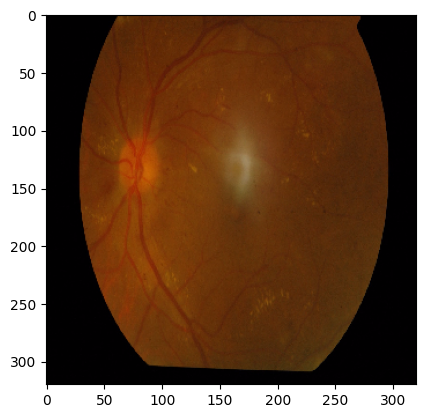

[1. 0. 0. 0. 0.]


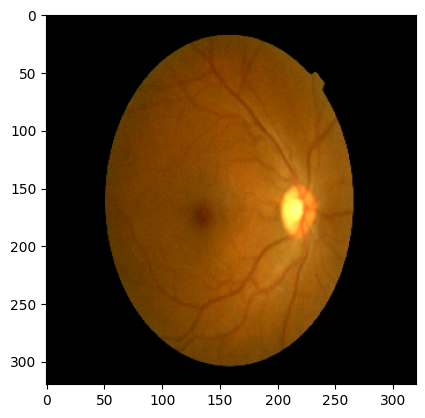

[0. 0. 1. 0. 0.]


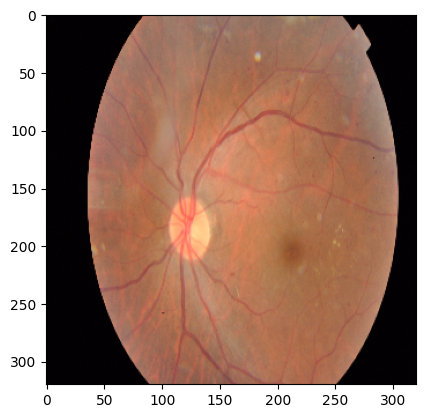

[1. 0. 0. 0. 0.]


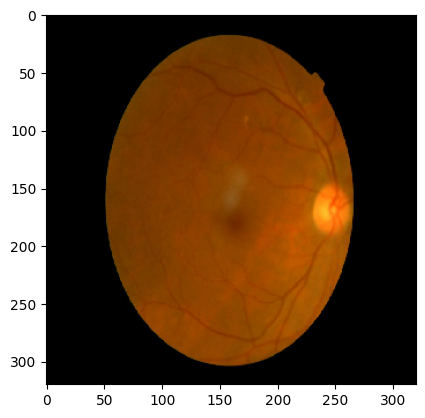

[1. 0. 0. 0. 0.]


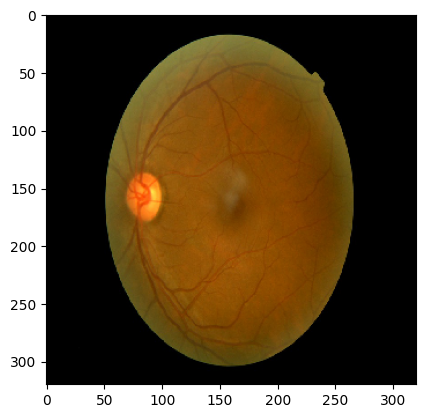

In [8]:
# View some images and labels

plt.imshow(data[0])
print(labels[0])
plt.show()

plt.imshow(data[1])
print(labels[1])
plt.show()

plt.imshow(data[2])
print(labels[2])
plt.show()

plt.imshow(data[3])
print(labels[3])
plt.show()

plt.imshow(data[4])
print(labels[4])
plt.show()

In [9]:
# Load model
model = tf.keras.models.load_model("/content/drive/MyDrive/Explainability Exercise/model.h5")

In [10]:
# Generate some predictions

predictions = model.predict(data).argmax(axis=1)

1/1 [==============================] - 11s 11s/step


2
[0. 0. 1. 0. 0.]


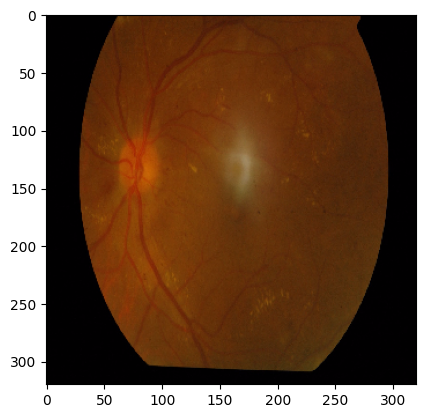

0
[1. 0. 0. 0. 0.]


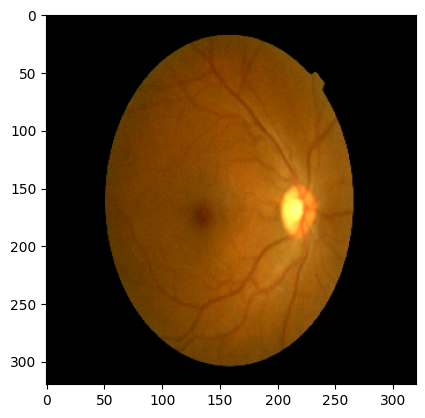

2
[1. 0. 0. 0. 0.]


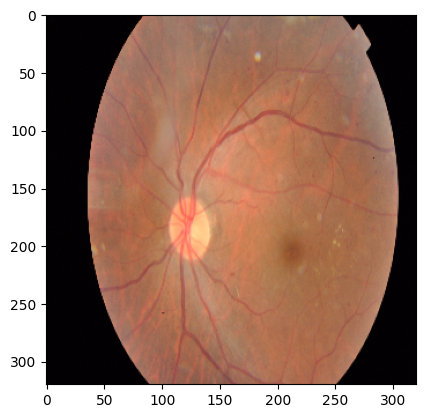

0
[1. 0. 0. 0. 0.]


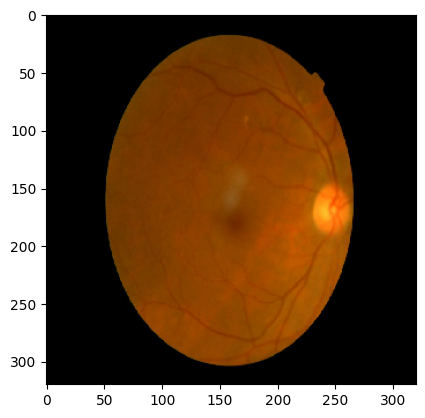

0
[1. 0. 0. 0. 0.]


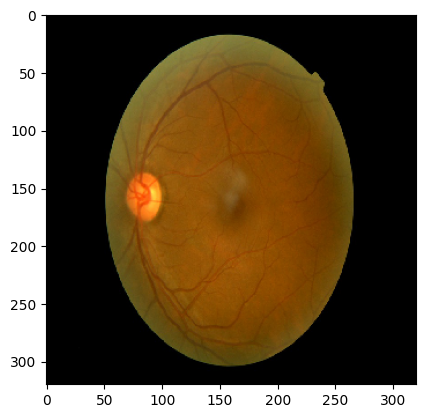

In [11]:
# View some predictions


plt.imshow(data[0])
print(predictions[0])
print(labels[0])
plt.show()

plt.imshow(data[1])
print(predictions[1])
print(labels[1])
plt.show()

plt.imshow(data[2])
print(predictions[2])
print(labels[1])
plt.show()

plt.imshow(data[3])
print(predictions[3])
print(labels[1])
plt.show()

plt.imshow(data[4])
print(predictions[4])
print(labels[1])
plt.show()

In [12]:
# Generate explanations

explanation = "explanation goes here..."
# ...

In [15]:
diagnosis_dict = {0: 'No DR',
                  1: 'Mild',
                  2: 'Moderate',
                  3: 'Severe',
                  4: 'Proliferative DR'}

In [16]:
# generator for html template

def generate_html(name, image, prediction, explanation):
      html = open("explanation_template.html").read()


      html = html.replace("PXX", "John Doe")
      html = html.replace("GXX", "Male")
      html = html.replace("GXX", "Male")

      plt.imshow(image)
      #plt.title("Prediction: %s" % (prediction))
      plt.savefig('IMAGE_FOR_DISPLAY.png')


      html = html.replace("DXX", diagnosis_dict[prediction])
      html = html.replace("EXPLANATION", explanation)

      with open(name, "w") as fp:
          fp.write(html)

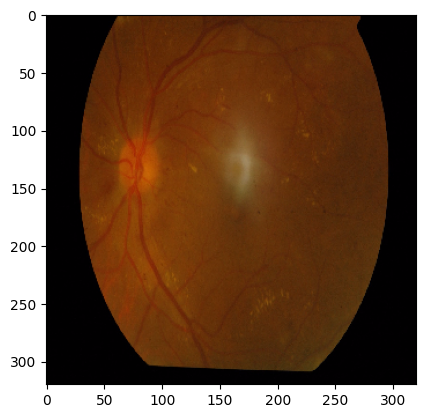

In [17]:
# Populate the html template

generate_html("test.html", data[0], predictions[0], explanation)